# 전처리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train = pd.read_csv("/content/drive/Shareddrives/21-1 딥러닝개론/데이터분석대회/train.csv")
test = pd.read_csv ("/content/drive/Shareddrives/21-1 딥러닝개론/데이터분석대회/test_x.csv")
sample_submission = pd.read_csv("/content/drive/Shareddrives/21-1 딥러닝개론/데이터분석대회/sample_submission.csv")

In [ ]:
len(train)

54879

정제하기

In [ ]:
train['text'].nunique(), train['author'].nunique()

(54744, 5)

In [ ]:
train.drop_duplicates(subset=['text'], inplace=True)

In [ ]:
print(train.isnull().values.any())

False


In [ ]:
train= train.dropna(how = 'any')
print(train.isnull().values.any())
print(len(train))

False
54744


   author  count
0       0  13223
1       1   7221
2       2  11477
3       3  15052
4       4   7771


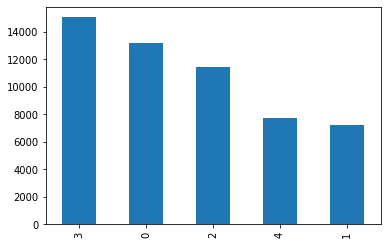

In [ ]:
train['author'].value_counts().plot(kind = 'bar')
print(train.groupby('author').size().reset_index(name = 'count'))

정규 표현식

In [ ]:
train['clean_txt'] = train['text'].str.replace("[^a-zA-Z]", " ")
test['clean_txt'] = test['text'].str.replace("[^a-zA-Z]", " ")

In [ ]:
train['clean_txt'] = train['clean_txt'].apply(lambda x: x.lower())
test['clean_txt'] = test['clean_txt'].apply(lambda x: x.lower())

In [ ]:
train[:10]

,index,text,author,clean_txt
0,0,"He was almost choking. There was so much, so m...",3,he was almost choking there was so much so m...
1,1,"“Your sister asked for it, I suppose?”",2,your sister asked for it i suppose
2,2,"She was engaged one day as she walked, in per...",1,she was engaged one day as she walked in per...
3,3,"The captain was in the porch, keeping himself ...",4,the captain was in the porch keeping himself ...
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,have mercy gentlemen odin flung up his han...
5,5,"""It was well fought,"" he said, ""and, by my soo...",4,it was well fought he said and by my soo...
6,6,"Not to pay him was impossible, considering his...",3,not to pay him was impossible considering his...
7,7,"“A proper figure of a man at-arms,” said the l...",2,a proper figure of a man at arms said the l...
8,8,"'You were not here last Sunday night,' he said.",0,you were not here last sunday night he said
9,9,“You must not ask me that!” I cried. “Hell may...,4,you must not ask me that i cried hell may...


In [ ]:
train.isnull().values.any() 

False

불용어 제거

In [ ]:
stopwords = pd.read_csv("/content/drive/MyDrive/21-1 KUBIG 데이터경진대회/stopwords.txt")

In [ ]:
def remove_newlines(fname):
    flist = open(fname).readlines()
    return [s.rstrip('\n') for s in flist]

In [ ]:
stopwords = remove_newlines("/content/drive/MyDrive/21-1 KUBIG 데이터경진대회/stopwords.txt")
print(stopwords)

['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train['clean_txt'] = train['clean_txt'].apply(remove_stopwords)
test['clean_txt'] = test['clean_txt'].apply(remove_stopwords)

In [ ]:
train

,index,text,author,clean_txt
0,0,"He was almost choking. There was so much, so m...",3,choking strange exclamations lips pole gazed f...
1,1,"“Your sister asked for it, I suppose?”",2,sister suppose
2,2,"She was engaged one day as she walked, in per...",1,engaged day walked perusing jane letter dwelli...
3,3,"The captain was in the porch, keeping himself ...",4,captain porch keeping carefully treacherous sh...
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,mercy gentlemen odin flung hands don write any...
...,...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2,smith odin whispered hardly dared hope
54875,54875,"I told my plan to the captain, and between us ...",4,told plan captain settled details accomplishment
54876,54876,"""Your sincere well-wisher, friend, and sister...",1,sincere wisher friend sister lucy odin
54877,54877,“Then you wanted me to lend you money?”,3,lend money


토큰화

In [ ]:
X_train = np.array([x for x in train['clean_txt']])
y_train = np.array([x for x in train['author']])
X_test = np.array([x for x in test['clean_txt']])

In [ ]:
print(X_train.shape)

(54744,)


In [ ]:
print(y_train.shape)

(54744,)


In [ ]:
print(X_train)

['choking strange exclamations lips pole gazed fixedly bundle notes hand looked odin evident perplexity'
 'sister suppose'
 'engaged day walked perusing jane letter dwelling passages proved jane written spirits instead surprised odin looking odin meeting putting letter immediately forcing smile'
 ... 'sincere wisher friend sister lucy odin' 'lend money' 'occurred yes']


In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size) 

tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train) 
sequences_test = tokenizer.texts_to_sequences(X_test)

print(len(sequences_train), len(sequences_test))

54744 19617


임베딩

In [ ]:
word_index = tokenizer.word_index

최대 길이: 1204
평균 길이: 0.0005662721028788543


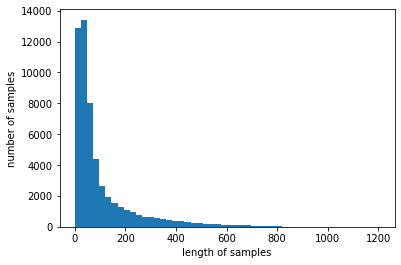

In [ ]:
print('최대 길이:', max(len(l) for l in train['clean_txt']))
print('평균 길이:', sum(map(len, train))/len(train['clean_txt']))

plt.hist([len(s) for s in train['clean_txt']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 300
below_threshold_len(max_len, train['clean_txt']) 

전체 샘플 중 길이가 300 이하인 샘플의 비율: 91.29584977349116


In [ ]:
train_x = pad_sequences(sequences_train, padding='post', maxlen=max_len) 
test_x = pad_sequences(sequences_test, padding='post' , maxlen=max_len)

print(train_x.shape, test_x.shape)

(54744, 300) (19617, 300)


In [ ]:
from keras.utils import np_utils

In [ ]:
train_y = np_utils.to_categorical(y_train)
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54744, 5)


# 단방향 lstm 모델링

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
vocab_size = 2000 
embedding_dim = 200  
max_len = 300 
padding_type='post'

In [ ]:
model1 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_len),
        tf.keras.layers.LSTM(units = 64, return_sequences = True),
        tf.keras.layers.LSTM(units = 64, return_sequences = True),
        tf.keras.layers.LSTM(units = 64),
        Dense(5, activation='softmax')   
    ])
    
model1.compile(loss= 'categorical_crossentropy', 
              optimizer= 'adam', metrics = ['accuracy']) 
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 200)          400000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 300, 64)           67840     
_________________________________________________________________
lstm_13 (LSTM)               (None, 300, 64)           33024     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
Total params: 534,213
Trainable params: 534,213
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(train_x, train_y, epochs=10, batch_size=100, validation_split= 0.2) 

Epoch 1/10
438/438 [==============================] - 31s 64ms/step - loss: 1.5725 - accuracy: 0.2742 - val_loss: 1.5716 - val_accuracy: 0.2689
Epoch 2/10
438/438 [==============================] - 27s 62ms/step - loss: 1.5703 - accuracy: 0.2717 - val_loss: 1.5713 - val_accuracy: 0.2689
Epoch 3/10
438/438 [==============================] - 27s 63ms/step - loss: 1.5689 - accuracy: 0.2783 - val_loss: 1.5714 - val_accuracy: 0.2689
Epoch 4/10
438/438 [==============================] - 27s 62ms/step - loss: 1.5696 - accuracy: 0.2773 - val_loss: 1.5722 - val_accuracy: 0.2689
Epoch 5/10
438/438 [==============================] - 27s 62ms/step - loss: 1.5690 - accuracy: 0.2788 - val_loss: 1.5721 - val_accuracy: 0.2689
Epoch 6/10
438/438 [==============================] - 27s 62ms/step - loss: 1.5693 - accuracy: 0.2761 - val_loss: 1.5722 - val_accuracy: 0.2689
Epoch 7/10
438/438 [==============================] - 27s 62ms/step - loss: 1.5710 - accuracy: 0.2752 - val_loss: 1.5713 - val_accuracy:

<function matplotlib.pyplot.show>

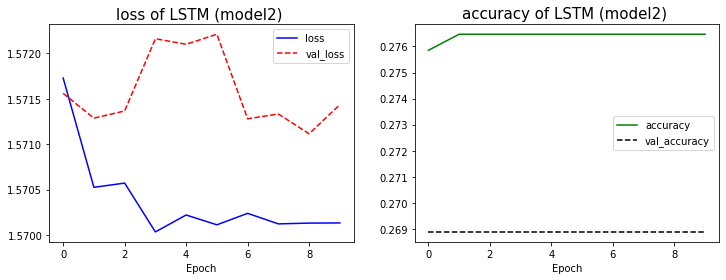

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of LSTM (model2) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of LSTM (model2) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

학습되지 않음

# 양방향 lstm

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [ ]:
vocab_size = 2000
embedding_dim = 200  
max_len = 300   
padding_type='post'

In [ ]:
model2 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_len),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax') 
    ])
    
model2.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy']) 
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 200)          400000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300, 128)          135680    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 300, 128)          98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
Total params: 733,957
Trainable params: 733,957
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(train_x, train_y, epochs=10, batch_size=100, validation_split= 0.2) 

Epoch 1/10
438/438 [==============================] - 65s 135ms/step - loss: 1.3356 - accuracy: 0.4178 - val_loss: 0.9875 - val_accuracy: 0.6101
Epoch 2/10
438/438 [==============================] - 57s 129ms/step - loss: 0.9305 - accuracy: 0.6374 - val_loss: 0.9560 - val_accuracy: 0.6266
Epoch 3/10
438/438 [==============================] - 56s 129ms/step - loss: 0.8507 - accuracy: 0.6662 - val_loss: 0.9463 - val_accuracy: 0.6311
Epoch 4/10
438/438 [==============================] - 56s 129ms/step - loss: 0.8118 - accuracy: 0.6835 - val_loss: 0.9616 - val_accuracy: 0.6300
Epoch 5/10
438/438 [==============================] - 57s 129ms/step - loss: 0.7858 - accuracy: 0.6922 - val_loss: 0.9817 - val_accuracy: 0.6264
Epoch 6/10
438/438 [==============================] - 56s 129ms/step - loss: 0.7565 - accuracy: 0.7047 - val_loss: 0.9992 - val_accuracy: 0.6164
Epoch 7/10
438/438 [==============================] - 56s 128ms/step - loss: 0.7335 - accuracy: 0.7091 - val_loss: 1.0428 - val_ac

<function matplotlib.pyplot.show>

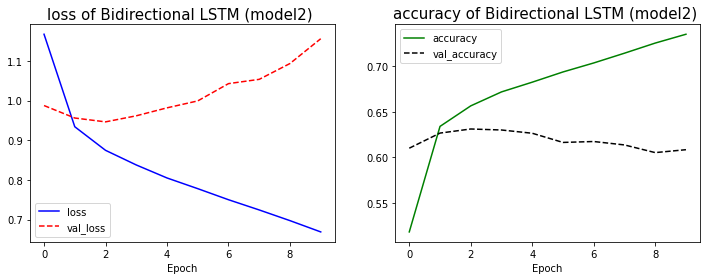

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM (model2) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM (model2) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

loss값은 줄지만 val_loss는 증가하고 accuracy는 증가하지만 val_accuracy는 높지 않음

# 계층 교차검증

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model, to_categorical
import warnings 
warnings.filterwarnings(action='ignore')

In [ ]:
n_fold = 5  
seed = 5

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, y_train), 1):
    print(f'training model for CV #{i}')

    model2.fit(train_x[i_trn], 
            to_categorical(y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=512)

training model for CV #1
Epoch 1/10
86/86 [==============================] - 26s 301ms/step - loss: 0.6980 - accuracy: 0.7397 - val_loss: 0.7005 - val_accuracy: 0.7388
Epoch 2/10
86/86 [==============================] - 26s 300ms/step - loss: 0.6591 - accuracy: 0.7519 - val_loss: 0.7092 - val_accuracy: 0.7362
Epoch 3/10
86/86 [==============================] - 26s 300ms/step - loss: 0.6331 - accuracy: 0.7621 - val_loss: 0.7193 - val_accuracy: 0.7302
Epoch 4/10
86/86 [==============================] - 26s 301ms/step - loss: 0.6103 - accuracy: 0.7708 - val_loss: 0.7398 - val_accuracy: 0.7217
Epoch 5/10
86/86 [==============================] - 26s 300ms/step - loss: 0.5911 - accuracy: 0.7774 - val_loss: 0.7674 - val_accuracy: 0.7160
Epoch 6/10
86/86 [==============================] - 26s 301ms/step - loss: 0.5717 - accuracy: 0.7837 - val_loss: 0.7911 - val_accuracy: 0.7128
Epoch 7/10
86/86 [==============================] - 26s 302ms/step - loss: 0.5524 - accuracy: 0.7911 - val_loss: 0.82

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
n_fold = 5  
seed = 5

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

test_y = np.zeros((test_x.shape[0], 5))

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, y_train), 1):
    print(f'training model for CV #{i}')

    model2.fit(train_x[i_trn], 
            to_categorical(y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])    
                      
    test_y += model2.predict(test_x) / n_fold  

training model for CV #1
Epoch 1/10
86/86 [==============================] - 26s 301ms/step - loss: 0.3029 - accuracy: 0.8877 - val_loss: 0.2505 - val_accuracy: 0.9009
Epoch 2/10
86/86 [==============================] - 26s 302ms/step - loss: 0.2525 - accuracy: 0.9020 - val_loss: 0.2550 - val_accuracy: 0.9004
Epoch 3/10
86/86 [==============================] - 26s 300ms/step - loss: 0.2251 - accuracy: 0.9117 - val_loss: 0.2667 - val_accuracy: 0.8958
Epoch 4/10
86/86 [==============================] - 26s 301ms/step - loss: 0.2115 - accuracy: 0.9167 - val_loss: 0.2788 - val_accuracy: 0.8908
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
training model for CV #2
Epoch 1/10
86/86 [==============================] - 26s 303ms/step - loss: 0.2594 - accuracy: 0.9001 - val_loss: 0.2364 - val_accuracy: 0.9084
Epoch 2/10
86/86 [==============================] - 26s 302ms/step - loss: 0.2291 - accuracy: 0.9109 - val_loss: 0.2460 - val_accuracy: 0.9014
Epoch 3/

# 테스트 

In [ ]:
test_y

array([[5.67884008e-05, 2.12806688e-01, 7.85080709e-01, 6.00444153e-04,
        1.45538145e-03],
       [9.92039224e-05, 1.33876733e-03, 3.06015334e-04, 2.37835509e-04,
        9.98018220e-01],
       [9.27375406e-01, 5.19855203e-04, 1.84547723e-02, 4.92805452e-05,
        5.36006751e-02],
       ...,
       [8.52225662e-06, 9.99967113e-01, 2.01906473e-05, 3.39426964e-06,
        7.62534064e-07],
       [1.34971445e-02, 9.57654670e-01, 1.92574564e-04, 2.86179683e-02,
        3.76670807e-05],
       [1.45392645e-01, 4.03675759e-03, 8.33026893e-01, 1.10714616e-02,
        6.47220288e-03]])

In [ ]:
sample_submission[['0','1','2','3','4']] = test_y
sample_submission

,index,0,1,2,3,4
0,0,0.000057,0.212807,0.785081,0.000600,1.455381e-03
1,1,0.000099,0.001339,0.000306,0.000238,9.980182e-01
2,2,0.927375,0.000520,0.018455,0.000049,5.360068e-02
3,3,0.000010,0.000326,0.999361,0.000004,2.997383e-04
4,4,0.000096,0.000017,0.002561,0.131906,8.654206e-01
...,...,...,...,...,...,...
19612,19612,0.000009,0.999318,0.000631,0.000024,1.845052e-05
19613,19613,0.000025,0.000004,0.000087,0.000014,9.998711e-01
19614,19614,0.000009,0.999967,0.000020,0.000003,7.625341e-07
19615,19615,0.013497,0.957655,0.000193,0.028618,3.766708e-05


In [ ]:
aa= pd.DataFrame(sample_submission)
aa.to_csv("sample_submission1.csv", index=False)
from google.colab import files
files.download('sample_submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>